<a href="https://colab.research.google.com/github/pyannote/pyannote-audio/blob/develop/tutorials/MRE_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sharing a minimal reproduction example (MRE) is a prerequisite for `pyannote.audio` contributors to be able to solve them.

Having an MRE is very important for contributors to be able to reproduce the bug in the same way that you are experiencing it. When testing a potential fix for the issue, contributors will use the MRE to validate that the fix is working as intended.

This notebook provides a template that should help you create such a MRE.

Duplicate it, edit it, and share it as a link within your `pyannote.audio` bug report.

# Setup

Before anything, make sure to run this section.

Specify the `pyannote.audio` version you found the issue in (including the Git commit hash if using a non-released version).

In [1]:
!pip install -qqq pyannote.audio==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.7/208.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.6/630.6 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

Declare your [Huggingface token](https://huggingface.co/settings/tokens) as `HF_TOKEN` secret by clicking on the 🔑 icon on the left:

* **Name**: `HF_TOKEN`  
* **Value**: your Huggingface token (e.g. `hf_ABCdzRFTkglhlcalBAPGHSQvxLmQs`)

Check that you can load the pretrained pipeline.

In [3]:
# access your HF token
from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')

# load the pretrained pipeline
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained(
    "pyannote/speaker-diarization-3.1",
    use_auth_token=hf_token)

config.yaml:   0%|          | 0.00/469 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/pyannote/audio/pipelines/speaker_verification.py:43: UserWarning: torchaudio._backend.get_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  backend = torchaudio.get_audio_backend()
/usr/local/lib/python3.10/dist-packages/pyannote/audio/pipelines/speaker_verification.py:53: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend(backend)
/usr/local/lib/python3.10/dist-packages/pyannote/audio/tasks/segmentation/mixins.py:37: UserWarning: `torchaudio.backend.common.AudioMetaData` has been moved to `torchaudio.AudioMetaData`. Please update the import path.
  from torchaudio.backend.common import AudioMetaData


pytorch_model.bin:   0%|          | 0.00/5.91M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/399 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/26.6M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/221 [00:00<?, ?B/s]

Check that GPU is available and send pipeline to GPU.

In [4]:
import torch
if torch.cuda.is_available():
   gpu = torch.device("cuda")
   pipeline.to(gpu)
else:
   print("Please switch to (free) T4 GPU runtime.")

Dowload a sample audio file (make sure the download link is public or your bug report will not be reproducible by anyone).

In [5]:
!wget https://github.com/pyannote/pyannote-audio/raw/develop/tutorials/assets/sample.wav

--2024-01-08 15:31:41--  https://github.com/pyannote/pyannote-audio/raw/develop/tutorials/assets/sample.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pyannote/pyannote-audio/develop/tutorials/assets/sample.wav [following]
--2024-01-08 15:31:41--  https://raw.githubusercontent.com/pyannote/pyannote-audio/develop/tutorials/assets/sample.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960104 (938K) [audio/wav]
Saving to: ‘sample.wav’

sample.wav          100%[===================>] 937.60K  --.-KB/s    in 0.04s   

2024-01-08 15:31:42 (25.7 MB/s) - ‘sample.wav’ saved [960104/960104]



Apply the pretrained pipeline and visualize the output.

In [6]:
diarization = pipeline("sample.wav")

/usr/local/lib/python3.10/dist-packages/pyannote/audio/utils/reproducibility.py:74: ReproducibilityWarning: TensorFloat-32 (TF32) has been disabled as it might lead to reproducibility issues and lower accuracy.
It can be re-enabled by calling
   >>> import torch
   >>> torch.backends.cuda.matmul.allow_tf32 = True
   >>> torch.backends.cudnn.allow_tf32 = True
See https://github.com/pyannote/pyannote-audio/issues/1370 for more details.

  warnings.warn(


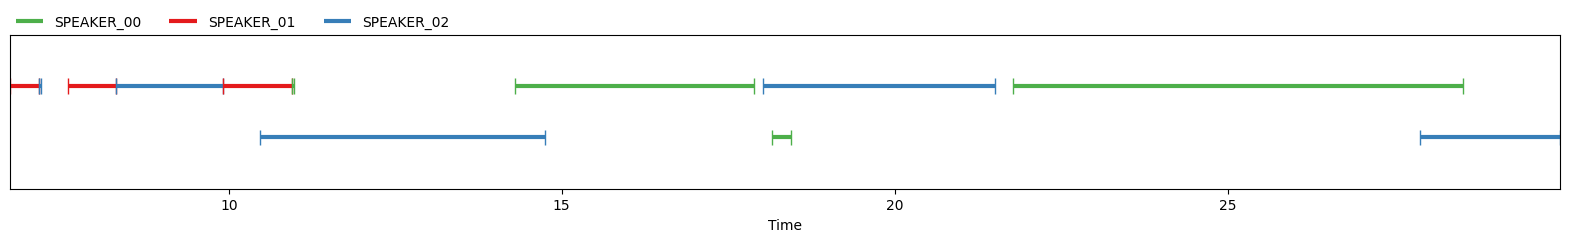

In [7]:
diarization

# MRE

Now that things are setup, edit the following cells with the piece of code allowing to reproduce the bug report.


In [8]:
from pyannote.audio import Model
model = Model.from_pretrained(
    "pyannote/speaker-diarization-3.1",
    use_auth_token=hf_token)

EntryNotFoundError: 404 Client Error. (Request ID: Root=1-659c1570-229842ad49cdd505022bd7b3;3b3426ec-0f8e-49a4-8783-f5740d92a8ed)

Entry Not Found for url: https://huggingface.co/pyannote/speaker-diarization-3.1/resolve/main/pytorch_model.bin.

In [9]:
# this does not work because `pyannote/speaker-diarization-3.1` is a not a `Model`, it is a `Pipeline`.